<a href="https://colab.research.google.com/github/MadhumithaJM/Codsoft-/blob/main/Task_2_Movie_Rating_Prediction_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive.zip to archive (1).zip


/tmp/ipython-input-8-1680945867.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Unknown", inplace=True)


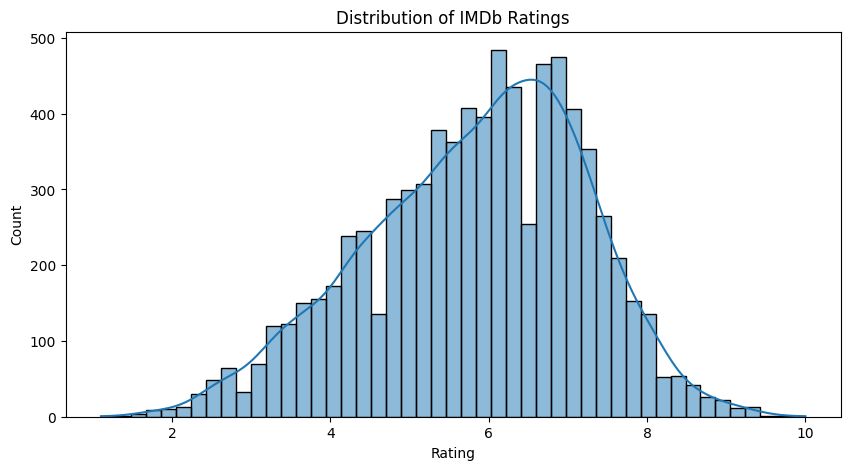

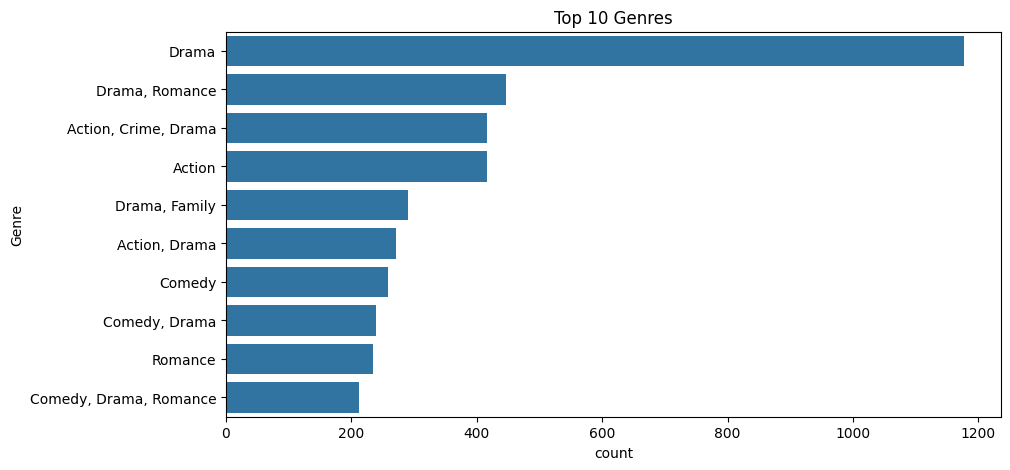

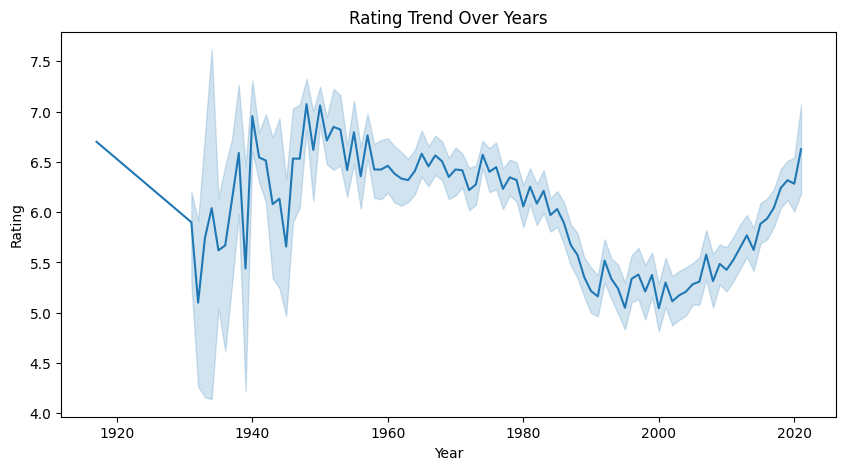

MSE: 1.344567451388889


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
from google.colab import files
uploaded = files.upload()

import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall()

df = pd.read_csv("IMDb Movies India.csv", encoding="ISO-8859-1")
df.columns = df.columns.str.strip()
df = df.dropna(subset=["Rating"])
df["Duration"] = df["Duration"].str.extract("(\d+)").astype(float)
df["Year"] = df["Year"].astype(str).str.extract("(\d{4})").astype(float)
df["Votes"] = pd.to_numeric(df["Votes"], errors="coerce")
df.fillna("Unknown", inplace=True)

plt.figure(figsize=(10,5))
sns.histplot(df["Rating"], kde=True)
plt.title("Distribution of IMDb Ratings")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y="Genre", data=df, order=df["Genre"].value_counts().head(10).index)
plt.title("Top 10 Genres")
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(x="Year", y="Rating", data=df)
plt.title("Rating Trend Over Years")
plt.show()

features = ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3", "Duration", "Year", "Votes"]
X = df[features].copy()
y = df["Rating"]

for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

output = pd.DataFrame({"Actual Rating": y_test, "Predicted Rating": y_pred})
output.reset_index(drop=True, inplace=True)
output.to_csv("predicted_ratings.csv", index=False)
files.download("predicted_ratings.csv")